## Importing Required Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import pickle

## Importing Dataset

In [285]:
df = pd.read_csv('AQI.csv')

In [286]:
df.shape

(16695, 14)

In [287]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [288]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [290]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,16393,174,United States of America,3954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16695,14229,Santa Cruz,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQI Value,16695.0,NaN,NaN,NaN,62.998682,43.091971,7.0,38.5,52.0,69.0,500.0
AQI Category,16695,6,Good,7708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO AQI Value,16695.0,NaN,NaN,NaN,1.342138,2.371379,0.0,1.0,1.0,1.0,133.0
CO AQI Category,16695,3,Good,16691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ozone AQI Value,16695.0,NaN,NaN,NaN,31.767355,22.839343,0.0,20.0,29.0,38.0,222.0
Ozone AQI Category,16695,5,Good,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO2 AQI Value,16695.0,NaN,NaN,NaN,3.819647,5.880677,0.0,0.0,2.0,5.0,91.0
NO2 AQI Category,16695,2,Good,16684,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
df.dtypes

Country                object
City                   object
AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

## Cleaning Dataset

In [292]:
df.drop_duplicates(inplace = True)
df.shape

(16695, 14)

In [293]:
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [294]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [295]:
df.dropna(inplace=True)

In [296]:
df.shape

(16393, 14)

In [297]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

## Statistical Analysis

In [298]:
newdf = df.drop(['lat','lng'],axis = 1)
newdf.corr()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.458529,0.328959,0.308275,0.980604
CO AQI Value,0.458529,1.000000,0.039960,0.398974,0.458980
Ozone AQI Value,0.328959,0.039960,1.000000,-0.252301,0.234705
NO2 AQI Value,0.308275,0.398974,-0.252301,1.000000,0.340821
PM2.5 AQI Value,0.980604,0.458980,0.234705,0.340821,1.000000


In [299]:
newdf.cov()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1874.697691,47.450208,327.250551,78.905081,1841.775980
CO AQI Value,47.450208,5.712313,2.194322,5.637044,47.585804
Ozone AQI Value,327.250551,2.194322,527.892216,-34.268277,233.922249
NO2 AQI Value,78.905081,5.637044,-34.268277,34.946365,87.398564
PM2.5 AQI Value,1841.775980,47.585804,233.922249,87.398564,1881.718430


### AQI Level

In [300]:
##Highest AQI levels in Country
AQI_Country= df[['AQI Value','Country']]
AQI_Country.groupby('Country').sum().sort_values('AQI Value',ascending=False).head()

,AQI Value
Country,
United States of America,236573
India,113331
Italy,53554
China,53517
Germany,50987


In [301]:
## Average AQI level in Country
AvgAQI_Country= df[['AQI Value','Country']]
AvgAQI_Country.groupby('Country').mean()

,AQI Value
Country,
Afghanistan,86.333333
Albania,77.111111
Algeria,106.250000
Andorra,32.000000
Angola,85.000000
...,...
Venezuela (Bolivarian Republic of),82.651515
Viet Nam,88.571429
Yemen,131.000000


In [302]:
##Highest AQI levels in Cities
AQI_City= df[['AQI Value','City']]
AQI_City.groupby('City').sum().sort_values('AQI Value',ascending=False).head()

,AQI Value
City,
Santa Ana,2250
San Fernando,1744
San Miguel,1683
Durango,1500
San Luis,1440


### Ozone AQI Level

In [303]:
#### Highest Ozone AQI Values in Country
OZ_Country= df[['Ozone AQI Value','Country']]
OZ_Country.groupby('Country').sum().sort_values('Ozone AQI Value',ascending=False).head()

,Ozone AQI Value
Country,
United States of America,110051
India,42856
Italy,38108
Germany,38052
China,36358


In [304]:
## Average Ozone AQI level in Country
AvgOZ_Country= df[['Ozone AQI Value','Country']]
AvgOZ_Country.groupby('Country').mean()

,Ozone AQI Value
Country,
Afghanistan,42.000000
Albania,42.555556
Algeria,35.000000
Andorra,32.000000
Angola,23.190476
...,...
Venezuela (Bolivarian Republic of),16.424242
Viet Nam,48.714286
Yemen,44.333333


In [305]:
#### Highest Ozone AQI Values in City
OZ_Country= df[['Ozone AQI Value','City']]
OZ_Country.groupby('City').sum().sort_values('Ozone AQI Value',ascending=False).head()

,Ozone AQI Value
City,
Saidpur,865
Fatehpur,774
Springfield,540
Santa Cruz,510
Madhubani,484


In [306]:
## Average Ozone AQI level in Country
AvgPM_Country= df[['PM2.5 AQI Value','Country']]
AvgPM_Country.groupby('Country').mean()

,PM2.5 AQI Value
Country,
Afghanistan,86.333333
Albania,76.555556
Algeria,106.250000
Andorra,24.000000
Angola,82.523810
...,...
Venezuela (Bolivarian Republic of),82.651515
Viet Nam,83.428571
Yemen,131.000000


### PM2.5 AQI Level

In [307]:
## Highest PM2.5 AQI Values in Country
PM_Country= df[['PM2.5 AQI Value','Country']]
PM_Country.groupby('Country').sum().sort_values('PM2.5 AQI Value',ascending=False).head()

,PM2.5 AQI Value
Country,
United States of America,230068
India,111248
Italy,48642
Germany,48625
China,47408


In [308]:
## Highest PM2.5 AQI Values in City
PM_City= df[['PM2.5 AQI Value','City']]
PM_City.groupby('City').sum().sort_values('PM2.5 AQI Value',ascending=False).head()

,PM2.5 AQI Value
City,
Santa Ana,2250
San Fernando,1744
San Miguel,1683
Durango,1500
San Luis,1440


### NO2 AQI Level

In [309]:
#### Highest NO2 AQI Values in Country
NO_Country= df[['NO2 AQI Value','Country']]
NO_Country.groupby('Country').sum().sort_values('NO2 AQI Value',ascending=False).head()

,NO2 AQI Value
Country,
United States of America,33541
China,2911
Germany,2084
Italy,2003
Japan,1859


In [310]:
## Average NO2 AQI level in Country
AvgNO_Country= df[['NO2 AQI Value','Country']]
AvgNO_Country.groupby('Country').mean()

,NO2 AQI Value
Country,
Afghanistan,0.000000
Albania,0.555556
Algeria,25.750000
Andorra,0.000000
Angola,2.238095
...,...
Venezuela (Bolivarian Republic of),4.939394
Viet Nam,1.714286
Yemen,0.000000


In [311]:
#### Highest NO2 AQI Values in City
NO_Country= df[['NO2 AQI Value','City',]]
NO_Country.groupby('City').sum().sort_values('NO2 AQI Value',ascending=False).head()

,NO2 AQI Value
City,
San Fernando,448
Stratford,195
Richmond,170
Durango,159
Milton,144


## Graphical Analysis

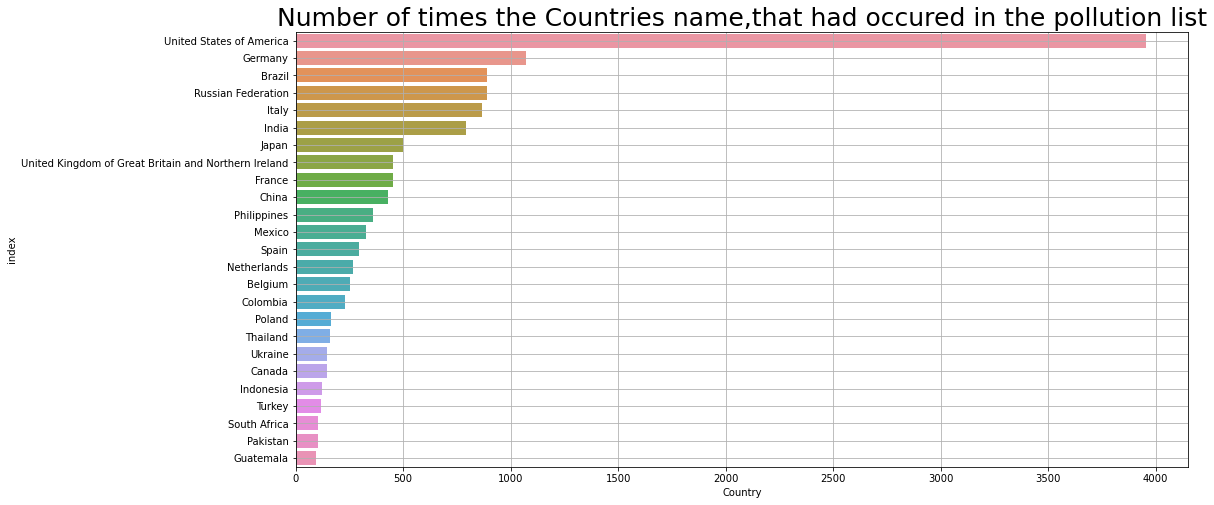

In [312]:
df1=df.Country.value_counts().sort_values(ascending=False)[:25].reset_index()
plt.figure(figsize=(16, 8))
sns.barplot(data=df1, y='index', x='Country')
plt.title("Number of times the Countries name,that had occured in the pollution list", size = 25)
plt.grid()

Text(0, 0.5, 'Latitude')

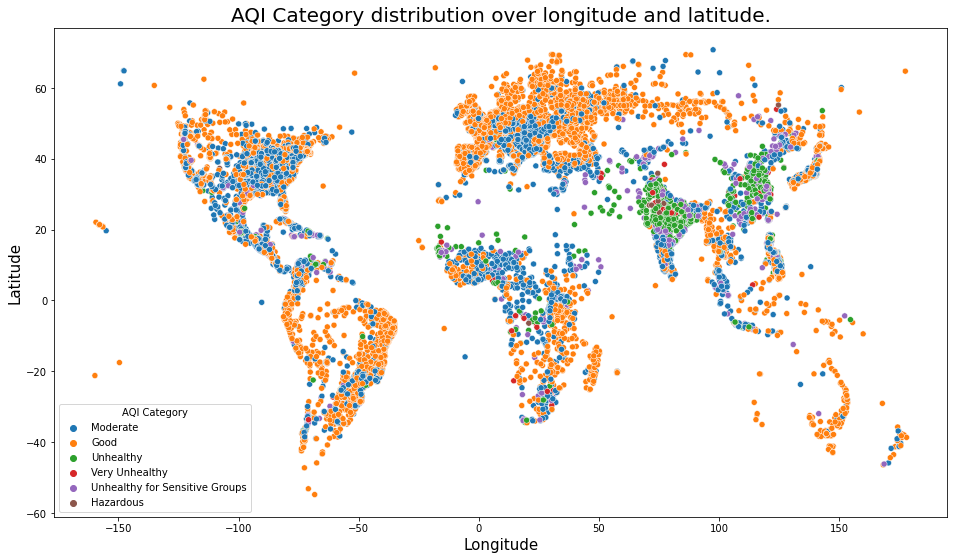

In [313]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="lng", y="lat", hue=df["AQI Category"])
plt.title("AQI Category distribution over longitude and latitude.", size = 20)
plt.xlabel("Longitude", size = 15)
plt.ylabel("Latitude", size = 15)

Text(0, 0.5, 'Latitude')

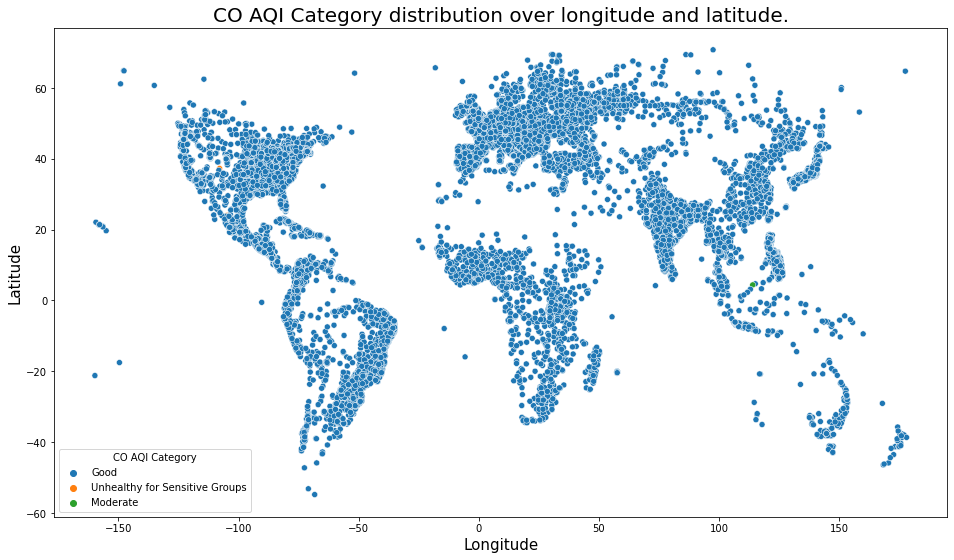

In [314]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="lng", y="lat", hue=df["CO AQI Category"])
plt.title("CO AQI Category distribution over longitude and latitude.", size = 20)
plt.xlabel("Longitude", size = 15)
plt.ylabel("Latitude", size = 15)

Text(0, 0.5, 'Latitude')

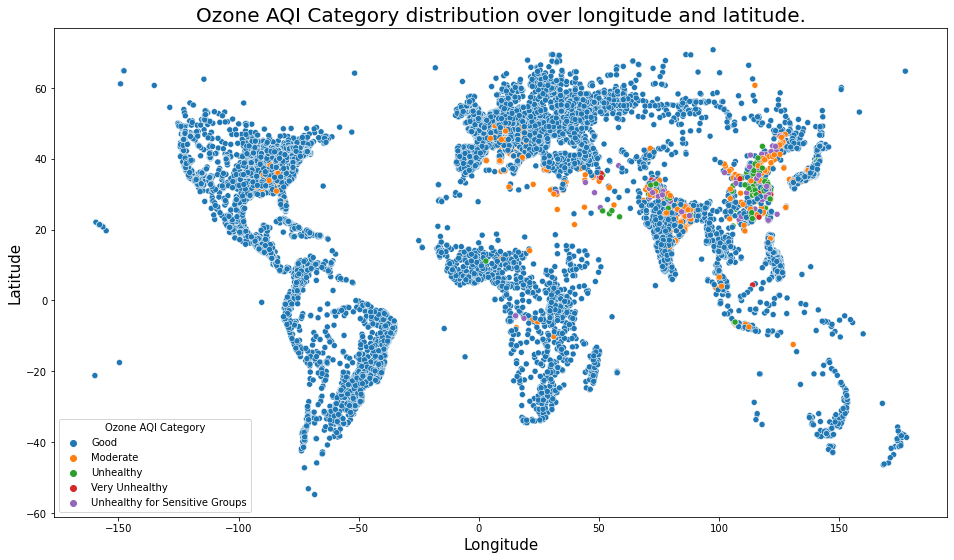

In [315]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="lng", y="lat", hue=df["Ozone AQI Category"])
plt.title("Ozone AQI Category distribution over longitude and latitude.", size = 20)
plt.xlabel("Longitude", size = 15)
plt.ylabel("Latitude", size = 15)

Text(0, 0.5, 'Latitude')

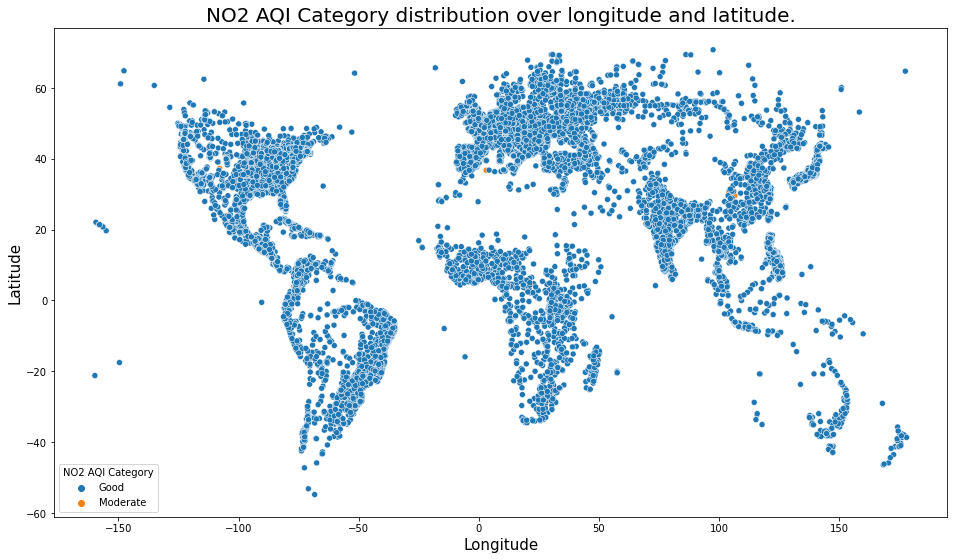

In [316]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="lng", y="lat", hue=df["NO2 AQI Category"])
plt.title("NO2 AQI Category distribution over longitude and latitude.", size = 20)
plt.xlabel("Longitude", size = 15)
plt.ylabel("Latitude", size = 15)

Text(0, 0.5, 'Latitude')

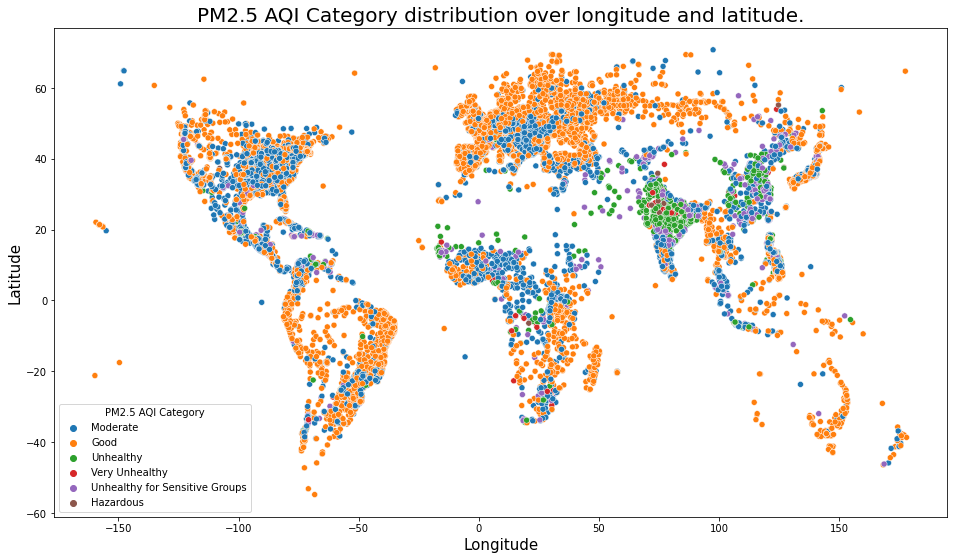

In [317]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="lng", y="lat", hue=df["PM2.5 AQI Category"])
plt.title("PM2.5 AQI Category distribution over longitude and latitude.", size = 20)
plt.xlabel("Longitude", size = 15)
plt.ylabel("Latitude", size = 15)

In [318]:
#new = df.drop(['Country', 'City', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng'], axis = 1, inplace = True)

Text(0, 0.5, 'AQI')

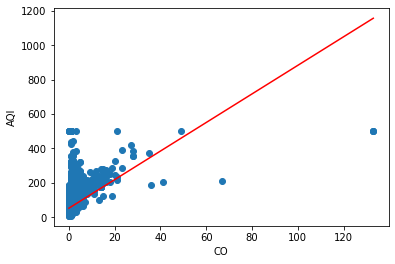

In [319]:
plt.scatter(df["CO AQI Value"], df["AQI Value"])
plt.plot(np.unique(df["CO AQI Value"]), np.poly1d(np.polyfit(df["CO AQI Value"], df["AQI Value"], 1))(np.unique(df["CO AQI Value"])), color = "red")
plt.xlabel("CO")
plt.ylabel("AQI")

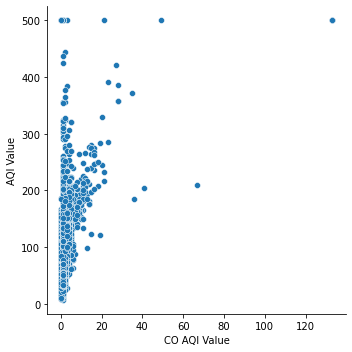

In [320]:
sns.relplot(x = df["CO AQI Value"], y = df["AQI Value"])

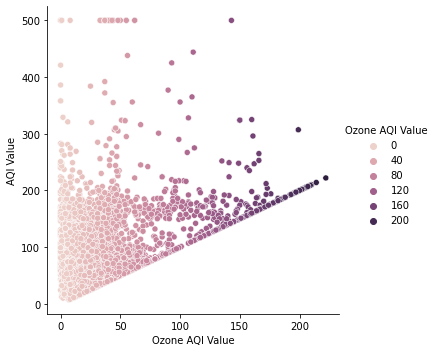

In [321]:
sns.relplot(x = df["Ozone AQI Value"], y = df["AQI Value"], hue = df["Ozone AQI Value"])

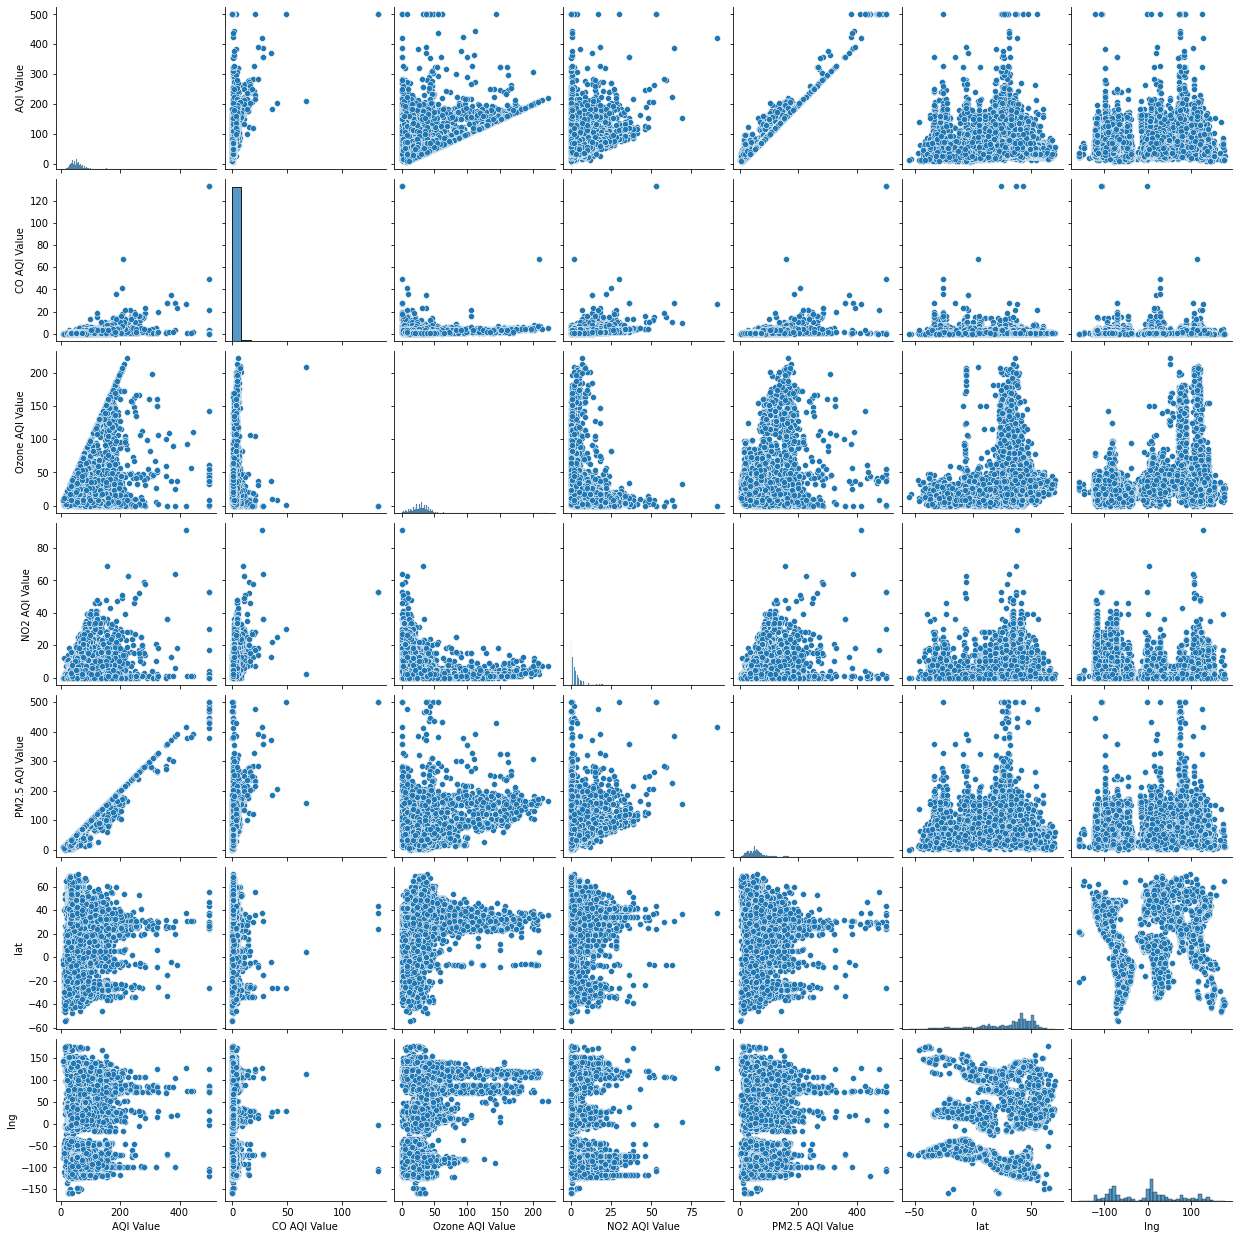

In [322]:
sns.pairplot(df)

In [323]:
# Correlation value
df.corr()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
AQI Value,1.000000,0.458529,0.328959,0.308275,0.980604,-0.101673,0.155514
CO AQI Value,0.458529,1.000000,0.039960,0.398974,0.458980,-0.077734,0.003489
Ozone AQI Value,0.328959,0.039960,1.000000,-0.252301,0.234705,0.247768,0.323898
NO2 AQI Value,0.308275,0.398974,-0.252301,1.000000,0.340821,0.038933,-0.290050
PM2.5 AQI Value,0.980604,0.458980,0.234705,0.340821,1.000000,-0.127804,0.118152
lat,-0.101673,-0.077734,0.247768,0.038933,-0.127804,1.000000,-0.021740
lng,0.155514,0.003489,0.323898,-0.290050,0.118152,-0.021740,1.000000


<AxesSubplot:>

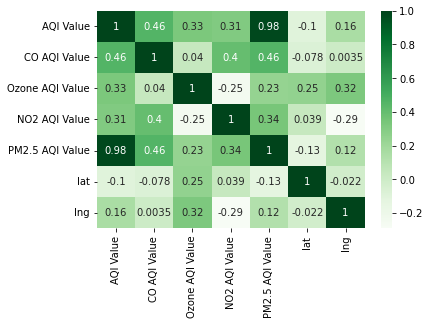

In [324]:
# Correlation table
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

## Training Machine Learning Model

In [325]:
X = df[['CO AQI Value', 'Ozone AQI Value',
       'NO2 AQI Value', 'PM2.5 AQI Value']]

y = df['AQI Value']

### Splitting data into train and test

In [326]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=69)

In [327]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13114, 4), (3279, 4), (13114,), (3279,))

### Linear Regression

In [328]:
model = LinearRegression()
model

LinearRegression()

In [329]:
model.fit(X_train, y_train)

LinearRegression()

In [330]:
y_pred = model.predict(X_test)

In [331]:
r2_score(y_test,y_pred) , mean_absolute_error(y_test,y_pred)

(0.9685832439546666, 4.433505800872887)

### Decision Tree

In [332]:
dt = DecisionTreeRegressor(max_depth=8)
dt

DecisionTreeRegressor(max_depth=8)

In [333]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [334]:
dt_y_pred = dt.predict(X_test)

In [335]:
r2_score(y_test,dt_y_pred) , mean_absolute_error(y_test,dt_y_pred)

(0.9961395531562973, 0.8073231884505383)

## Creating Pickle file

In [336]:
pickle.dump(dt,open('dt.pkl','wb'))